In [1]:
#Implementation of counterfeit NFT Test Image Generation from NFT Azuki Collection 
# Counterfeit in applying changing of brightness, distortion, rotation, and resize of the image

from PIL import Image, ImageEnhance
import random
import numpy as np
import matplotlib.pyplot as plt

# Define image generation with brightness
def adjust_brightness(image, brightness_factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(brightness_factor)

# Define image generation with distortion
def apply_distortion(image, distortion_scale):
    width, height = image.size
    x_scale = np.random.uniform(0, distortion_scale)
    y_scale = np.random.uniform(0, distortion_scale)
    x_distortion = np.random.uniform(-x_scale, x_scale, width)
    y_distortion = np.random.uniform(-y_scale, y_scale, height)
    mesh_x, mesh_y = np.meshgrid(np.arange(width), np.arange(height))
    mesh_x_distorted = np.clip(mesh_x + x_distortion, 0, width - 1).astype(int)
    mesh_y_distorted = np.clip(mesh_y + y_distortion, 0, height - 1).astype(int)
    distorted_image = np.array(image)
    for c in range(distorted_image.shape[2]):
        distorted_image[:, :, c] = distorted_image[mesh_y_distorted, mesh_x_distorted, c]
    return Image.fromarray(distorted_image)

# Define image generation with resizing
def apply_resize(image, size):
    return image.resize(size)

# Define the generation of counterfeit NFT for each transformation
def generate_counterfeit_nft(image_path):
    original_image = Image.open(image_path)

    # Adjust brightness
    brightness_factor = random.uniform(0.5, 2)
    brightened_image = adjust_brightness(original_image, brightness_factor)
    brightened_image.save("counterfeit_nft_brightness.png")

    # Apply distortion
    distortion_scale = random.uniform(2, 3)
    distorted_image = apply_distortion(original_image, distortion_scale)
    distorted_image.save("counterfeit_nft_distortion.png")

    # Apply rotation
    rotation_angle = random.uniform(-25, 25)
    rotated_image = original_image.rotate(rotation_angle)
    rotated_image.save("counterfeit_nft_rotation.png")

    # Resize image
    target_size = (128, 128)  # Specify the desired size
    resized_image = apply_resize(original_image, target_size)
    resized_image.save("counterfeit_nft_resize.png")

    # Display images in horizontal row with titles below
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    images = [brightened_image, distorted_image, rotated_image, resized_image]
    titles = ["Brightness", "Distortion", "Rotation", "Resize"]

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis("off")
        ax.set_title(titles[i], fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

원본 NFT 이미지


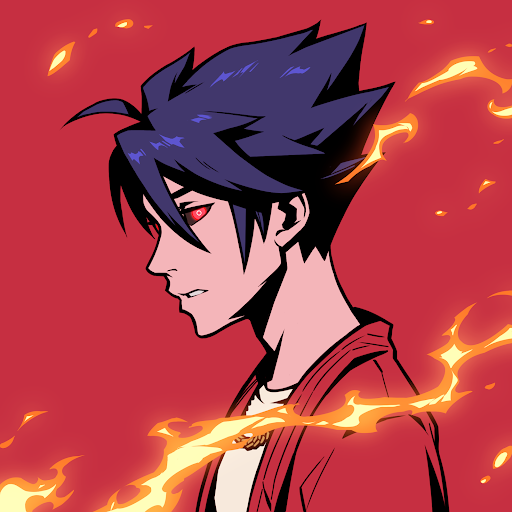

In [2]:
print("원본 NFT 이미지")
orig_img = Image.open("image_384.png")
orig_img.show()

위조 NFT 시험 이미지 생성


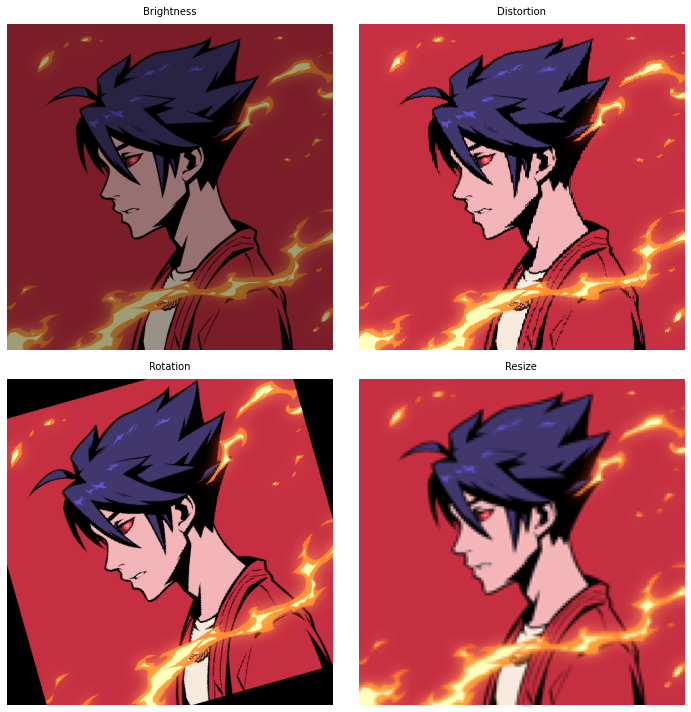

In [8]:
print("위조 NFT 시험 이미지 생성")
generate_counterfeit_nft("image_384.png")